# Autoregression Models for Time Series Forecasting With Python

## Autoregression Model

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [1]:
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
series = read_csv("daily-min-temperatures.csv", header=0, index_col=0)

Split into train and test sets

In [3]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

Train autoregression

In [4]:
model = AutoReg(train, lags=29)

/home/vladiant/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [5]:
model_fit = model.fit()

In [6]:
print(f"Coefficients: {model_fit.params}")

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


Make predictions

In [7]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [8]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, expected={test[i]}")

predicted=11.871274847727845, expected=[12.9]
predicted=13.05379421722984, expected=[14.6]
predicted=13.532590951105147, expected=[14.]
predicted=13.243126458186246, expected=[13.6]
predicted=13.091438030688007, expected=[13.5]
predicted=13.146988838852259, expected=[15.7]
predicted=13.17615345557424, expected=[13.]


In [9]:
rmse = sqrt(mean_squared_error(test, predictions))

In [10]:
print(f"Test RMSE: {rmse:.3f}")

Test RMSE: 1.225


Plot predictions vs expected

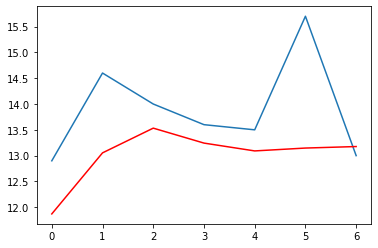

In [11]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()